In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset = pd.get_dummies(dataset, dtype=int, drop_first=True)

In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [7]:
dependent = dataset[['charges']]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.30, random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion ='squared_error', splitter='random', max_features=None)
regressor = regressor.fit(x_train, y_train)

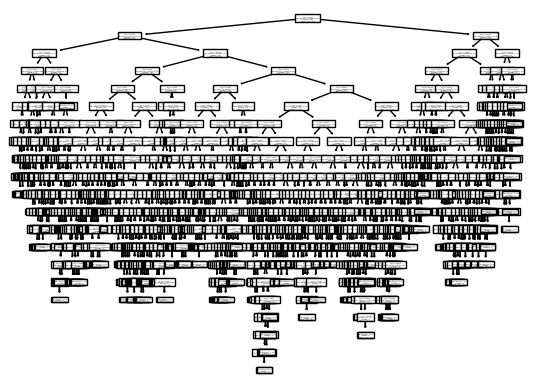

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [11]:
y_pred = regressor.predict(x_test)

In [12]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)

In [13]:
r_score

0.7076936471491737